In [4]:
from scipy.stats import binom

def binom_dist_range(n, p, x):
    """
    Computes the probability of observing x or more successes in a binomial distribution,
    equivalent to Excel's BINOM.DIST.RANGE(n, p, x)
    
    :param n: Total number of trials (observations)
    :param p: Probability of success in each trial
    :param x: Minimum number of successes to calculate probability for
    :return: Probability of getting at least x successes
    """
    p_value = 1 - binom.cdf(x - 1, n, p)
    return p_value

# Hypothesis Test Explanation
print("Hypothesis Test: Tesla Entering the Indian Market")
print("------------------------------------------------")
print("Null Hypothesis (H0): Tesla is NOT entering the Indian market.")
print("Alternative Hypothesis (H1): Tesla IS entering the Indian market.")
print("We analyze the probability of observing 5 or more favorable events supporting Tesla's entry.")
print("If this probability is very low under H0, we reject the null hypothesis.")

# Given values for the binomial test
n = 7  # Total number of observed events (positive + negative indicators)
p = 0.05  # Probability of success under the null hypothesis (Tesla not entering)
x = 5  # Minimum number of favorable events required

# Compute p-value
p_value = binom_dist_range(n, p, x)

# Display results
print(f"Total Observations (n): {n}")
print(f"Success Probability Under H0 (p): {p}")
print(f"Favorable Events Required (x): {x}")
print(f"Computed P-value: {p_value:.10f}")

# Decision Rule
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Result: P-value is less than 0.05, so we REJECT the null hypothesis.")
    print("Conclusion: Strong evidence suggests that Tesla is entering the Indian market.")
else:
    print("Result: P-value is greater than 0.05, so we FAIL TO REJECT the null hypothesis.")
    print("Conclusion: Insufficient evidence to confirm Tesla's entry into the Indian market.")


Hypothesis Test: Tesla Entering the Indian Market
------------------------------------------------
Null Hypothesis (H0): Tesla is NOT entering the Indian market.
Alternative Hypothesis (H1): Tesla IS entering the Indian market.
We analyze the probability of observing 5 or more favorable events supporting Tesla's entry.
If this probability is very low under H0, we reject the null hypothesis.
Total Observations (n): 7
Success Probability Under H0 (p): 0.05
Favorable Events Required (x): 5
Computed P-value: 0.0000060273
Result: P-value is less than 0.05, so we REJECT the null hypothesis.
Conclusion: Strong evidence suggests that Tesla is entering the Indian market.


Monte Carlo Simulation: Tesla's EV Revenue in India
----------------------------------------------------------------
Mean Total Revenue: ₹9,203,058,007.23
Standard Deviation of Total Revenue: ₹2,858,480,962.50
This simulation estimates revenue based on Tesla's new India-focused EV priced at ₹20 lakhs, with sales and market penetration projections.


C:\Users\Ramachandran S\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


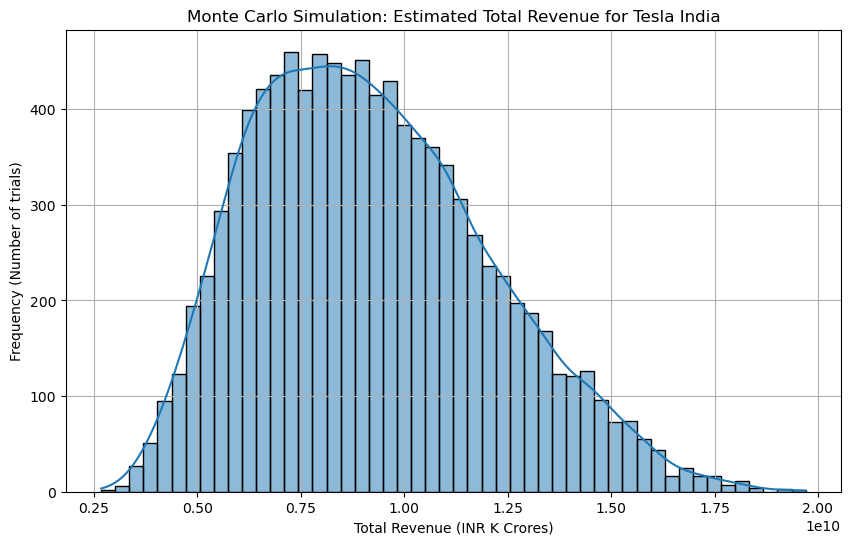

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Updated Parameters for Tesla's New Affordable Model in India
mean_revenue_per_unit = 2000000  # Estimated Mean Revenue per Tesla unit (₹20 lakhs)
std_dev_revenue_per_unit = 200000  # Standard deviation due to pricing variations
min_units_sold = 20000  # Minimum projected units sold
max_units_sold = 45000  # Maximum projected units sold
min_penetration = 0.075  # Minimum market penetration rate
most_likely_penetration = 0.15  # Most likely market penetration rate
max_penetration = 0.20  # Maximum market penetration rate

# Number of simulations
num_simulations = 10000

# Array to store results
total_revenue_results = []

# Monte Carlo Simulation
for _ in range(num_simulations):
    # Random revenue per unit (Normal distribution)
    avg_revenue = np.random.normal(mean_revenue_per_unit, std_dev_revenue_per_unit)
    
    # Random number of units sold (Uniform distribution)
    units_sold = np.random.uniform(min_units_sold, max_units_sold)
    
    # Random market penetration rate (Triangular distribution)
    market_penetration = np.random.triangular(min_penetration, most_likely_penetration, max_penetration)
    
    # Calculate total revenue
    total_revenue = units_sold * avg_revenue * market_penetration
    total_revenue_results.append(total_revenue)

# Convert results to numpy array for analysis
total_revenue_results = np.array(total_revenue_results)

# Analyze results
mean_revenue = np.mean(total_revenue_results)
std_dev_revenue = np.std(total_revenue_results)

# Print results with explanations
print("Monte Carlo Simulation: Tesla's EV Revenue in India")
print("----------------------------------------------------------------")
print(f"Mean Total Revenue: ₹{mean_revenue:,.2f}")
print(f"Standard Deviation of Total Revenue: ₹{std_dev_revenue:,.2f}")
print("This simulation estimates revenue based on Tesla's new India-focused EV priced at ₹20 lakhs, with sales and market penetration projections.")

# Visualize results with a histogram
plt.figure(figsize=(10, 6))
sns.histplot(total_revenue_results, bins=50, kde=True)
plt.title('Monte Carlo Simulation: Estimated Total Revenue for Tesla India')
plt.xlabel('Total Revenue (INR K Crores)')
plt.ylabel('Frequency (Number of trials)')
plt.grid()
plt.show()